In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from models import *

In [8]:
a = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/epoch_100-label_noise_prob_0-input_gaussian_noise_SD_0-gaussian_noise_SD_0.002-noise_decay_fixed-batch_size_64-lr_1.0.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/epoch_100-label_noise_prob_0.5-input_gaussian_noise_SD_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128-lr_1.0.pt', map_location ='cpu')

c = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/epoch_100-label_noise_prob_0.5-input_gaussian_noise_SD_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024-lr_1.0.pt', map_location ='cpu')


In [9]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], c['test_acc_array'][-1], '\n')
print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1], c['train_loss_array'][-1])

a['test_acc_array']

test accuracy: 93.38 93.45 93.24 

train loss: 0.00047144899773411453 0.00023619633965194225 5.4453286528587344e-05


array([63.15, 74.84, 81.25, 86.65, 87.82, 90.47, 91.18, 92.24, 92.59,
       92.82, 93.15, 93.2 , 93.34, 93.46, 93.38, 93.3 , 93.36, 93.31,
       93.34, 93.37, 93.36, 93.36, 93.37, 93.37, 93.36, 93.36, 93.37,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38, 93.38,
       93.38])

In [10]:
# # Loading the nets

# net1 = VGG('VGG19')
# net1.load_state_dict(a['net'], strict=False)
# net1.eval()

# net2 = VGG('VGG19')
# net2.load_state_dict(b['net'], strict=False)
# net2.eval()

In [12]:
# Loading the nets

net1 = Linear_mnist()
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = Linear_mnist()
net2.load_state_dict(b['net'], strict=False)
net2.eval()

net3 = Linear_mnist()
net3.load_state_dict(c['net'], strict=False)
net3.eval()

Linear_mnist(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=512, bias=True)
  (l3): Linear(in_features=512, out_features=256, bias=True)
  (l4): Linear(in_features=256, out_features=256, bias=True)
  (l5): Linear(in_features=256, out_features=128, bias=True)
  (l6): Linear(in_features=128, out_features=10, bias=True)
)

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.1264)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(1.8744)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(1.3122)


torch.Size([1, 3, 32, 32])

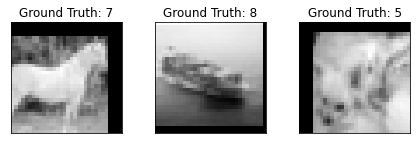

In [255]:
# loading the data

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
crop=32
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
input_dim = [1,3,32,32]
num_classes = 10

transform_train = transforms.Compose([
    transforms.RandomCrop(crop, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()

In [256]:
Jac_1 = {}
Jac_2 = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x3072 and 784x512)

In [257]:
# Jac_1[0] == Jac_2[0]

In [258]:


for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    


KeyError: 0

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.4365)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.5141)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.2039)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x3072 and 784x512)

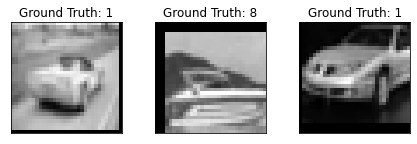

In [259]:
# loading the data - TEST


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(
    testset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()


Jac_1 = {}
Jac_2 = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)

In [ ]:

for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    
